In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing, feature_extraction
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

In [2]:
train = pd.read_csv("airbnb_train.csv")
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [3]:
test = pd.read_csv("aribnb_test.csv")
test.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [4]:
all_data = pd.concat((train, test), axis=0, ignore_index=True)
all_data.head()

c:\users\taruna garg\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,20090319043255
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,20090523174809
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,20090609231247
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,20091031060129
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,20091208061105


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 15 columns):
id                         62096 non-null object
date_account_created       62096 non-null object
timestamp_first_active     62096 non-null int64
date_first_booking         0 non-null float64
gender                     62096 non-null object
age                        33220 non-null float64
signup_method              62096 non-null object
signup_flow                62096 non-null int64
language                   62096 non-null object
affiliate_channel          62096 non-null object
affiliate_provider         62096 non-null object
first_affiliate_tracked    62076 non-null object
signup_app                 62096 non-null object
first_device_type          62096 non-null object
first_browser              62096 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 7.1+ MB


In [7]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275547 entries, 0 to 275546
Data columns (total 16 columns):
affiliate_channel          275547 non-null object
affiliate_provider         275547 non-null object
age                        158681 non-null float64
country_destination        213451 non-null object
date_account_created       275547 non-null object
date_first_booking         88908 non-null object
first_affiliate_tracked    269462 non-null object
first_browser              275547 non-null object
first_device_type          275547 non-null object
gender                     275547 non-null object
id                         275547 non-null object
language                   275547 non-null object
signup_app                 275547 non-null object
signup_flow                275547 non-null int64
signup_method              275547 non-null object
timestamp_first_active     275547 non-null int64
dtypes: float64(1), int64(2), object(13)
memory usage: 33.6+ MB


In [8]:
#Column date_first_booking is empty in test dataset. So, we can drop it from training dataset also.

train.drop('date_first_booking', axis=1, inplace=True)

In [9]:
train.isnull().sum()

id                             0
date_account_created           0
timestamp_first_active         0
gender                         0
age                        87990
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked     6065
signup_app                     0
first_device_type              0
first_browser                  0
country_destination            0
dtype: int64

Text(0,0.5,'Percentage booking')

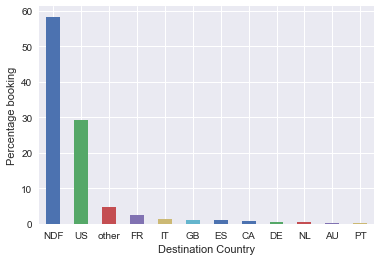

In [10]:
sns.set_style()
des_prec = train['country_destination'].value_counts(dropna=False)/train.shape[0] * 100
des_prec.plot('bar', rot=0)
plt.xlabel("Destination Country")
plt.ylabel("Percentage booking")

In [11]:
all_data.isnull().sum()

affiliate_channel               0
affiliate_provider              0
age                        116866
country_destination         62096
date_account_created            0
date_first_booking         186639
first_affiliate_tracked      6085
first_browser                   0
first_device_type               0
gender                          0
id                              0
language                        0
signup_app                      0
signup_flow                     0
signup_method                   0
timestamp_first_active          0
dtype: int64

--AGE--

In [12]:
all_data.describe()

,age,signup_flow,timestamp_first_active
count,158681.000000,275547.000000,2.755470e+05
mean,47.145310,4.291965,2.013310e+13
std,142.629468,8.794313,9.146438e+09
min,1.000000,0.000000,2.009032e+13
25%,28.000000,0.000000,2.013040e+13
50%,33.000000,0.000000,2.014010e+13
75%,42.000000,1.000000,2.014062e+13
max,2014.000000,25.000000,2.014093e+13


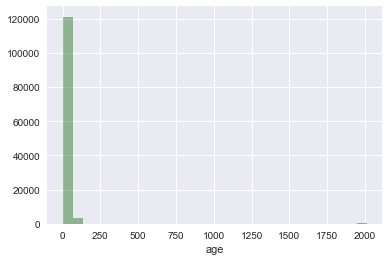

In [13]:
sns.distplot(train['age'].dropna(), kde = False, color = 'darkgreen', bins = 30)

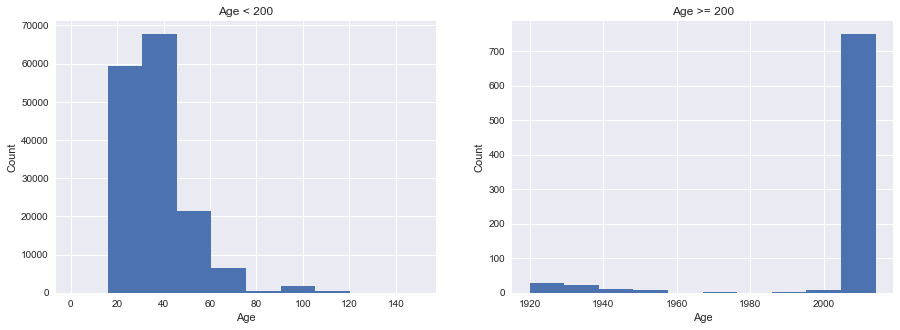

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15, 5))

axes[0].set_title('Age < 200')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
all_data[all_data.age < 200].age.hist(bins=10, ax=axes[0])

axes[1].set_title('Age >= 200')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')
all_data[all_data.age >= 200].age.hist(bins=10, ax=axes[1])

--GENDER--

In [15]:
all_data['gender'].value_counts()

-unknown-    129480
FEMALE        77524
MALE          68209
OTHER           334
Name: gender, dtype: int64

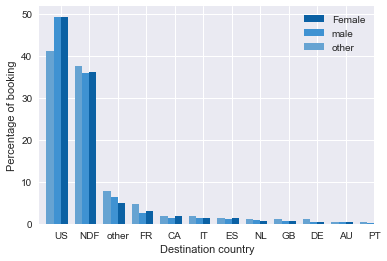

In [16]:
female = sum(train.gender == 'FEMALE')
male = sum(train.gender == 'MALE')
other = sum(train.gender == 'OTHER')

female_destination=train.loc[train.gender =='FEMALE','country_destination'].value_counts()/female * 100
male_destination=train.loc[train.gender =='MALE','country_destination'].value_counts()/male * 100
other_destination=train.loc[train.gender =='OTHER','country_destination'].value_counts()/other * 100

female_destination.plot('bar', width=0.25, color = '#0b61a4', position = 0, label = 'Female', rot = 0)
male_destination.plot('bar', width=0.25, color = '#3f92d2', position = 1, label = 'male', rot = 0)
other_destination.plot('bar', width=0.25, color = '#66a3d2', position = 2, label = 'other', rot = 0)

plt.legend()
plt.xlabel('Destination country')
plt.ylabel('Percentage of booking')
plt.show()

--Date_Account_Created--

Text(0.5,0,'Year')

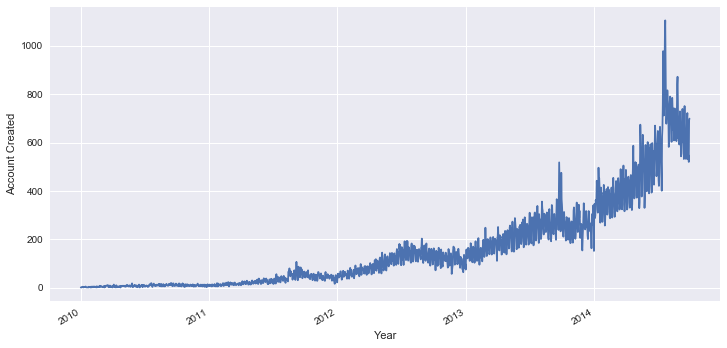

In [17]:
fig = plt.figure(figsize = (12, 6))
all_data.date_account_created = pd.to_datetime(all_data.date_account_created)
all_data.date_account_created.value_counts().plot()
plt.ylabel('Account Created')
plt.xlabel('Year')

Text(0.5,0,'Year')

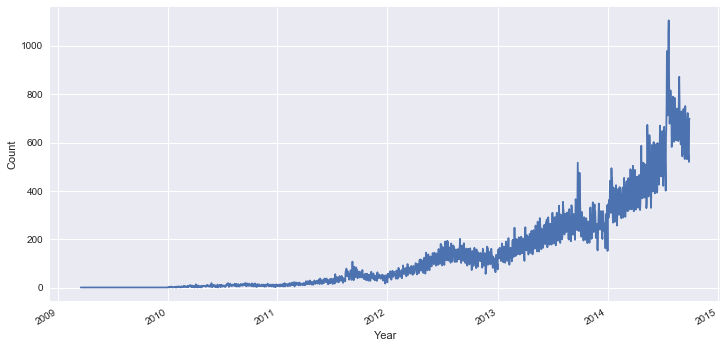

In [18]:
fig = plt.figure(figsize = (12, 6))
all_data['date_first_active'] = pd.to_datetime(all_data.timestamp_first_active // 1000000,format ='%Y%m%d')
all_data.date_first_active.value_counts().plot()
plt.ylabel('Count')
plt.xlabel('Year')

The feature account created and account first active has almost same values.

--Signup Method/ Signup App--

In [19]:
all_data['signup_app'].value_counts()

Web        219918
iOS         34593
Android     10519
Moweb       10517
Name: signup_app, dtype: int64

In [20]:
all_data['signup_method'].value_counts()

basic       198222
facebook     74864
google        2438
weibo           23
Name: signup_method, dtype: int64

--First Device/First Browser--

In [21]:
all_data['first_device_type'].value_counts()

Mac Desktop           106328
Windows Desktop        86948
iPhone                 39814
iPad                   18036
Other/Unknown          11167
Android Phone           9458
Android Tablet          2098
Desktop (Other)         1507
SmartPhone (Other)       191
Name: first_device_type, dtype: int64

In [22]:
all_data['first_browser'].value_counts().head(30)

Chrome                78671
Safari                53302
-unknown-             44394
Firefox               38665
Mobile Safari         29636
IE                    24744
Chrome Mobile          3186
Android Browser        1577
AOL Explorer            254
Opera                   228
Silk                    172
IE Mobile               118
BlackBerry Browser       89
Chromium                 83
Mobile Firefox           64
Maxthon                  60
Apple Mail               45
Sogou Explorer           43
SiteKiosk                27
RockMelt                 24
Iron                     24
IceWeasel                14
Yandex.Browser           14
Pale Moon                13
CometBird                12
SeaMonkey                12
Camino                    9
Opera Mini                8
TenFourFox                8
wOSBrowser                7
Name: first_browser, dtype: int64

In [23]:
all_data['language'].value_counts().head()

en    265538
zh      2634
fr      1508
es      1174
ko      1116
Name: language, dtype: int64

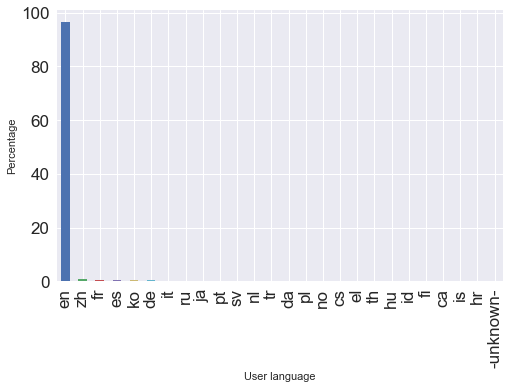

In [24]:
lang = all_data['language'].value_counts()/all_data.shape[0] * 100
plt.figure(figsize = (8, 5))
plt.xlabel('User language')
plt.ylabel('Percentage')
lang.plot('bar', fontsize = 17, rot = 90)

Most of users speak english

--Affiliate Channel/Afiliate Provider--

In [25]:
all_data.affiliate_channel.value_counts()

direct           181571
sem-brand         36439
sem-non-brand     20075
seo               14362
other              9547
api                8167
content            4118
remarketing        1268
Name: affiliate_channel, dtype: int64

In [26]:
all_data.affiliate_provider.value_counts()

direct                 181270
google                  65956
other                   13036
facebook                 3996
bing                     3719
craigslist               3475
padmapper                 836
vast                      830
yahoo                     653
facebook-open-graph       566
gsp                       455
meetup                    358
email-marketing           270
naver                      66
baidu                      32
yandex                     18
wayn                        8
daum                        3
Name: affiliate_provider, dtype: int64

In [27]:
all_data.first_affiliate_tracked.value_counts()

untracked        143181
linked            62064
omg               54859
tracked-other      6655
product            2353
marketing           281
local ops            69
Name: first_affiliate_tracked, dtype: int64

In [28]:
session = pd.read_csv("sessions_.csv")
session.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [29]:
session.shape

(10567737, 6)

In [30]:
session.isnull().sum()

user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

In [31]:
session.user_id.value_counts().head()

mxqbh3ykxl    2722
0hjoc5q8nf    2644
mjbl6rrj52    2476
l5lgm3w5pc    2424
wg9413iaux    2362
Name: user_id, dtype: int64

In [32]:
session.action.value_counts().head()

show              2768278
index              843699
search_results     725226
personalize        706824
search             536057
Name: action, dtype: int64

In [33]:
session.action_type.value_counts()

view                3560902
data                2103770
click               1996183
-unknown-           1031170
submit               623357
message_post          87103
partner_callback      19132
booking_request       18773
modify                 1139
booking_response          4
Name: action_type, dtype: int64

In [34]:
session.action_detail.value_counts().head()

view_search_results        1776885
p3                         1376550
-unknown-                  1031141
wishlist_content_update     706824
user_profile                656839
Name: action_detail, dtype: int64

In [35]:
session.device_type.value_counts().head()

Mac Desktop        3594286
Windows Desktop    2658539
iPhone             2105031
Android Phone       839637
iPad Tablet         683414
Name: device_type, dtype: int64

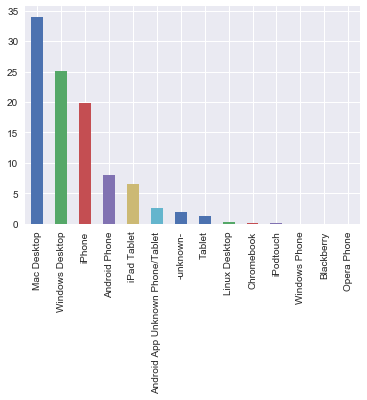

In [36]:
at = session.device_type.value_counts(dropna=False)/session.shape[0] * 100
at.plot('bar')

In [37]:
session.secs_elapsed.value_counts().head()

0.0    104624
1.0     27378
2.0     23004
3.0     20375
5.0     19589
Name: secs_elapsed, dtype: int64

# Preprocessing

In [38]:
train_label = train.loc[:, 'country_destination']
train_label.head()

0      NDF
1      NDF
2       US
3    other
4       US
Name: country_destination, dtype: object

In [39]:
train_data = train.iloc[:, 0:14]
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 14 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 22.8+ MB


In [40]:
test = test.drop(['date_first_booking'], axis=1)

In [41]:
date_acc_created_train = np.vstack(train.date_account_created.astype(str).apply(
    lambda x : list(map(int, x.split('-')))).values)

train['create_year'] = date_acc_created_train[:, 0]
train['create_month'] = date_acc_created_train[:, 1]
train['create_day'] = date_acc_created_train[:, 2]
train = train.drop(['date_account_created'], axis = 1)

date_acc_created_test = np.vstack(test.date_account_created.astype(str).apply(
    lambda x : list(map(int, x.split('-')))).values)

test['create_year'] = date_acc_created_test[:, 0]
test['create_month'] = date_acc_created_test[:, 1]
test['create_day'] = date_acc_created_test[:, 2]
test = test.drop(['date_account_created'], axis = 1)

In [42]:
train.head()

,id,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,create_year,create_month,create_day
0,gxn3p5htnn,20090319043255,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2010,6,28
1,820tgsjxq7,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,2011,5,25
2,4ft3gnwmtx,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,2010,9,28
3,bjjt8pjhuk,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,2011,12,5
4,87mebub9p4,20091208061105,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2010,9,14


In [43]:
train.loc[train.gender == '-unknown-', 'gender'] = -1
train.loc[train.gender.isnull(), 'gender'] = -1
test.loc[test.gender == '-unknown-', 'gender'] = -1
test.loc[test.gender.isnull(), 'gender'] = -1

In [44]:
gender_ec = {'FEMALE' : 0,
             'MALE' : 1,
             'OTHER' : 2,
              -1 : -1}

for data in [train, test]:
    data.gender = data.gender.apply(lambda x : gender_ec[x])

In [45]:
train.loc[train.age < 16, 'age'] = np.nan
train.loc[train.age > 90, 'age'] = np.nan
test.loc[test.age < 16, 'age'] = np.nan
test.loc[test.age > 90, 'age'] = np.nan

In [46]:
print(train.age.median())
print(test.age.median())

33.0
31.0


In [47]:
train.loc[train.age.isnull(), 'age'] = train.age.median()
test.loc[test.age.isnull(), 'age'] = test.age.median()

In [48]:
signup_ec = {'basic': 0,
             'facebook': 1,
             'google' : 2,
             'weibo' : 3 }

for data in [train, test]:
    data.signup_method = data.signup_method.apply(lambda x : signup_ec[x])

In [49]:
test.loc[test.language == '-unknown-', 'language'] = test.language.mode()[0]

In [50]:
from sklearn.preprocessing import LabelEncoder

la = LabelEncoder()
train.language = la.fit_transform(train.language)
test.language = la.fit_transform(test.language)

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 17 columns):
id                         213451 non-null object
timestamp_first_active     213451 non-null int64
gender                     213451 non-null int64
age                        213451 non-null float64
signup_method              213451 non-null int64
signup_flow                213451 non-null int64
language                   213451 non-null int32
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
create_year                213451 non-null int32
create_month               213451 non-null int32
create_day                 213451 non-null int32
dtypes: float64(1), int32(4), int64(4), object

In [52]:
train.affiliate_channel = la.fit_transform(train.affiliate_channel)
test.affiliate_channel = la.fit_transform(test.affiliate_channel)
train.affiliate_provider = la.fit_transform(train.affiliate_provider)
test.affiliate_provider = la.fit_transform(test.affiliate_provider)
train.first_browser = la.fit_transform(train.first_browser)
test.first_browser = la.fit_transform(test.first_browser)
train.signup_app = la.fit_transform(train.signup_app)
test.signup_app = la.fit_transform(test.signup_app)
train.first_device_type = la.fit_transform(train.first_device_type)
test.first_device_type = la.fit_transform(test.first_device_type)

In [53]:
train.loc[train.first_affiliate_tracked.isnull(), 'first_affiliate_tracked'] = 'untracked'
test.loc[test.first_affiliate_tracked.isnull(), 'first_affiliate_tracked'] = 'untracked'

In [54]:
train.first_affiliate_tracked = la.fit_transform(train.first_affiliate_tracked)
test.first_affiliate_tracked = la.fit_transform(test.first_affiliate_tracked)

In [55]:
train.head()

,id,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,create_year,create_month,create_day
0,gxn3p5htnn,20090319043255,-1,33.0,1,0,5,2,4,6,2,3,8,NDF,2010,6,28
1,820tgsjxq7,20090523174809,1,38.0,1,0,5,7,8,6,2,3,8,NDF,2011,5,25
2,4ft3gnwmtx,20090609231247,0,56.0,0,3,5,2,4,6,2,6,21,US,2010,9,28
3,bjjt8pjhuk,20091031060129,0,42.0,1,0,5,2,4,6,2,3,17,other,2011,12,5
4,87mebub9p4,20091208061105,-1,41.0,0,0,5,2,4,6,2,3,8,US,2010,9,14


In [56]:
df = session.user_id.value_counts()
df.head()

mxqbh3ykxl    2722
0hjoc5q8nf    2644
mjbl6rrj52    2476
l5lgm3w5pc    2424
wg9413iaux    2362
Name: user_id, dtype: int64

In [57]:
df = df.to_frame()

In [58]:
df = df.rename(columns = {'user_id' : 'session_count'})
df['id'] = df.index
df.head()

,session_count,id
mxqbh3ykxl,2722,mxqbh3ykxl
0hjoc5q8nf,2644,0hjoc5q8nf
mjbl6rrj52,2476,mjbl6rrj52
l5lgm3w5pc,2424,l5lgm3w5pc
wg9413iaux,2362,wg9413iaux


In [59]:
train = pd.merge(train, df, how = 'left', on = ['id'])

In [60]:
test = pd.merge(test, df, how = 'left', on = ['id'])

In [61]:
train.session_count.fillna(0, inplace=True)
test.session_count.fillna(0, inplace=True)

In [62]:
train.session_count = train.session_count.astype(int)
test.session_count = test.session_count.astype(int)

In [63]:
label = train_label.to_frame()
for data in [label]:
    data.country_destination = la.fit_transform(data.country_destination)

label.head()

,country_destination
0,7
1,7
2,10
3,11
4,10


In [64]:
train = train.drop(['id', 'timestamp_first_active', 'country_destination'], axis=1)
train.head()

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,create_year,create_month,create_day,session_count
0,-1,33.0,1,0,5,2,4,6,2,3,8,2010,6,28,0
1,1,38.0,1,0,5,7,8,6,2,3,8,2011,5,25,0
2,0,56.0,0,3,5,2,4,6,2,6,21,2010,9,28,0
3,0,42.0,1,0,5,2,4,6,2,3,17,2011,12,5,0
4,-1,41.0,0,0,5,2,4,6,2,3,8,2010,9,14,0


# Normalize

In [66]:
from sklearn import preprocessing
ss = preprocessing.StandardScaler()
train_scalar = pd.DataFrame(ss.fit_transform(train))
train_scalar.head()

c:\users\taruna garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\taruna garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.987150,-0.225180,1.559666,-0.427798,-0.139772,-0.508867,-0.589495,0.811626,-0.018455,-0.928434,-0.754483,-3.222044,-0.006939,1.387946,-0.345061
1,1.452068,0.339346,1.559666,-0.427798,-0.139772,2.384576,0.956108,0.811626,-0.018455,-0.928434,-0.754483,-2.156499,-0.315897,1.044700,-0.345061
2,0.232459,2.371640,-0.625500,-0.035009,-0.139772,-0.508867,-0.589495,0.811626,-0.018455,0.644693,0.169757,-3.222044,0.919936,1.387946,-0.345061
3,0.232459,0.790967,1.559666,-0.427798,-0.139772,-0.508867,-0.589495,0.811626,-0.018455,-0.928434,-0.114625,-2.156499,1.846811,-1.243607,-0.345061
4,-0.987150,0.678061,-0.625500,-0.427798,-0.139772,-0.508867,-0.589495,0.811626,-0.018455,-0.928434,-0.754483,-3.222044,0.919936,-0.213869,-0.345061


# Select and train model

## Use all features

1. Naive Bayes

We use gussian Naive Bayes because the features are continous and follows a normal distribution

In [72]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, label, test_size=0.2, random_state = 817)

In [73]:
gnb = GaussianNB()
gnb.fit(X_train, y_train.values.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [76]:
print('Accuracy score for Navie Bayes:')
print(gnb.score(X_test, y_test))

Accuracy score for Navie Bayes:
0.5480077768147853


2. Gradient Boosting

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(max_depth = 4, n_estimators = 100, random_state = 817)
gb.fit(X_train, y_train.values.ravel())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=817,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [80]:
print('Accuracy score for Gradient Boosting:')
print(gb.score(X_test, y_test))

Accuracy score for Gradient Boosting:
0.6304373287109696
